In [49]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from geopandas.tools import sjoin
import geoplot as gplt
from shapely.geometry import Point, Polygon

In [2]:
# Determine where the data files are
possible_paths = [
    "F:/Data Files/SI699/", # Jon's Desktop
    "D:/Data Files/SI699/",  # Jon's Laptop
    "C:/Users/nguye/OneDrive/Documents/01-School/06-Winter2019/04-SI699/03-Project/01-Exploration/data", # Tammy's Laptop
    "data/"
]

# see if any of the possible paths are valid
data_path = None
for path in possible_paths:
    if os.path.isdir(path):
        data_path = path
        break

assert data_path is not None
print("Path set as:",data_path)

Path set as: F:/Data Files/SI699/


In [4]:
%%time
# most of these files aren't of use at the moment. Keeping the import code just in case

# import code supplied by DonorsChoose.org at https://research.donorschoose.org/t/download-opendata/33
projects_df = pd.read_csv(data_path+'opendata_projects000.gz', escapechar='\\', names=['_projectid', '_teacher_acctid', '_schoolid', 'school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'school_zip', 'school_metro', 'school_district', 'school_county', 'school_charter', 'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp', 'school_charter_ready_promise', 'teacher_prefix', 'teacher_teach_for_america', 'teacher_ny_teaching_fellow', 'primary_focus_subject', 'primary_focus_area' ,'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'vendor_shipping_charges', 'sales_tax', 'payment_processing_charges', 'fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'total_donations', 'num_donors', 'eligible_double_your_impact_match', 'eligible_almost_home_match', 'funding_status', 'date_posted', 'date_completed', 'date_thank_you_packet_mailed', 'date_expiration'])
# donations_df = pd.read_csv(data_path+'opendata_donations000.gz', escapechar='\\', names=['_donationid', '_projectid', '_donor_acctid', '_cartid', 'donor_city', 'donor_state', 'donor_zip', 'is_teacher_acct', 'donation_timestamp', 'donation_to_project', 'donation_optional_support', 'donation_total', 'donation_included_optional_support', 'payment_method', 'payment_included_acct_credit', 'payment_included_campaign_gift_card', 'payment_included_web_purchased_gift_card', 'payment_was_promo_matched', 'is_teacher_referred', 'giving_page_id', 'giving_page_type', 'for_honoree', 'thank_you_packet_mailed'])
# resources_df = pd.read_csv(data_path+'opendata_resources000.gz', escapechar='\\', names=['_resourceid', '_projectid', 'vendorid', 'vendor_name', 'item_name', 'item_number', 'item_unit_price', 'item_quantity'])
essays_df = pd.read_csv(data_path+'opendata_essays000.gz', escapechar='\\', names=['_projectid', '_teacherid', 'title', 'short_description', 'need_statement', 'essay', 'thankyou_note', 'impact_letter'])
# giving_pages_df = pd.read_csv(data_path+'opendata_giving_pages000.gz', escapechar='\\', names=['giving_page_id', '_creator_acctid', 'created_date', 'is_active', 'most_recent_donation', 'amount_raised', 'number_of_donors', 'number_of_students', 'number_of_projects_supported', 'number_of_teachers', 'number_of_schools'])
# giving_page_projects_df = pd.read_csv(data_path+'opendata_giving_page_projects000.gz', escapechar='\\', names=['giving_page_id', '_projectid'])
# giftcards_df = pd.read_csv(data_path+'opendata_giftcards000.gz', escapechar='\\', names=['_giftcardid', 'dollar_tier', '_buyer_acctid', 'buyer_city', 'buyer_state', 'buyer_zip', 'date_purchased', '_buyer_cartid', '_recipient_acctid', 'recipient_city', 'recipient_state', 'recipient_zip', 'redeemed', 'date_redeemed', '_redeemed_cartid', 'payment_method', 'payment_included_acct_credit', 'payment_included_campaign_gift_card', 'payment_included_web_purchased_gift_card', 'payment_was_promo_matched'])

Wall time: 16.3 s


In [8]:
print("Dataset sizes:")
print("projects_df: {0:,} rows, {1} variables".format(*projects_df.shape))
# print("donations_df: {0:,} rows, {1} variables".format(*donations_df.shape))
# print("resources_df: {0:,} rows, {1} variables".format(*resources_df.shape))
print("essays_df: {0:,} rows, {1} variables".format(*essays_df.shape))
# print("giving_pages_df: {0:,} rows, {1} variables".format(*giving_pages_df.shape))
# print("giving_page_projects_df: {0:,} rows, {1} variables".format(*giving_page_projects_df.shape))
# print("giftcards_df: {0:,} rows, {1} variables".format(*giftcards_df.shape))

Dataset sizes:
projects_df: 1,203,287 rows, 44 variables
donations_df: 6,211,956 rows, 23 variables
resources_df: 7,274,265 rows, 8 variables
essays_df: 1,203,100 rows, 8 variables
giving_pages_df: 789,501 rows, 11 variables
giving_page_projects_df: 1,047,031 rows, 2 variables
giftcards_df: 1,053,024 rows, 20 variables


### Recast Categorical and Boolean Columns

In [5]:
# Projects Dataset
projects_df.school_metro = projects_df.school_metro.astype("category")
projects_df.teacher_prefix = projects_df.teacher_prefix.astype("category")
projects_df.resource_type = projects_df.resource_type.astype("category")
projects_df.poverty_level = projects_df.poverty_level.astype("category")
projects_df.grade_level = projects_df.grade_level.astype("category")
projects_df.funding_status = projects_df.funding_status.astype("category")
projects_df.school_charter = projects_df.school_charter.map({"f":False, "t":True})
projects_df.school_magnet = projects_df.school_magnet.map({"f":False, "t":True})
projects_df.school_year_round = projects_df.school_year_round.map({"f":False, "t":True})
projects_df.school_nlns = projects_df.school_nlns.map({"f":False, "t":True})
projects_df.school_kipp = projects_df.school_kipp.map({"f":False, "t":True})
projects_df.school_charter_ready_promise = projects_df.school_charter_ready_promise.map({"f":False, "t":True})
projects_df.teacher_teach_for_america = projects_df.teacher_teach_for_america.map({"f":False, "t":True})
projects_df.teacher_ny_teaching_fellow = projects_df.teacher_ny_teaching_fellow.map({"f":False, "t":True})
projects_df.eligible_double_your_impact_match = projects_df.eligible_double_your_impact_match.map({"f":False, "t":True})
projects_df.eligible_almost_home_match = projects_df.eligible_almost_home_match.map({"f":False, "t":True})

# Donations Dataset
# donations_df.is_teacher_acct = donations_df.is_teacher_acct.map({"f":False, "t":True})
# donations_df.donation_included_optional_support = donations_df.donation_included_optional_support.map({"f":False, "t":True})
# donations_df.payment_included_acct_credit = donations_df.payment_included_acct_credit.map({"f":False, "t":True})
# donations_df.payment_included_campaign_gift_card = donations_df.payment_included_campaign_gift_card.map({"f":False, "t":True})
# donations_df.payment_included_web_purchased_gift_card = donations_df.payment_included_web_purchased_gift_card.map({"f":False, "t":True})
# donations_df.payment_was_promo_matched = donations_df.payment_was_promo_matched.map({"f":False, "t":True})
# donations_df.is_teacher_referred = donations_df.is_teacher_referred.map({"f":False, "t":True})
# donations_df.for_honoree = donations_df.for_honoree.map({"f":False, "t":True})
# donations_df.thank_you_packet_mailed = donations_df.thank_you_packet_mailed.map({"f":False, "t":True})

# Giving Pages Dataset
# giving_pages_df.is_active = giving_pages_df.is_active.map({"f":False, "t":True})

# Gift Card Dataset
# giftcards_df.payment_method = giftcards_df.payment_method.astype("category")
# giftcards_df.redeemed = giftcards_df.redeemed.map({"f":False, "t":True})
# giftcards_df.payment_included_acct_credit = giftcards_df.payment_included_acct_credit.map({"f":False, "t":True})
# giftcards_df.payment_included_campaign_gift_card = giftcards_df.payment_included_campaign_gift_card.map({"f":False, "t":True})
# giftcards_df.payment_included_web_purchased_gift_card = giftcards_df.payment_included_web_purchased_gift_card.map({"f":False, "t":True})
# giftcards_df.payment_was_promo_matched = giftcards_df.payment_was_promo_matched.map({"f":False, "t":True})

In [30]:
# Missing Capitalization - affects 3 rows
projects_df.loc[projects_df.school_state == "La", "school_state"] = "LA"

## Preliminary Visualizations

In [12]:
print("Timespan Covered:")
print(projects_df.date_posted.min(),projects_df.date_posted.max())

Timespan Covered:
2002-09-13 00:00:00 2016-10-11 00:00:00


Time to fully fund completed projects


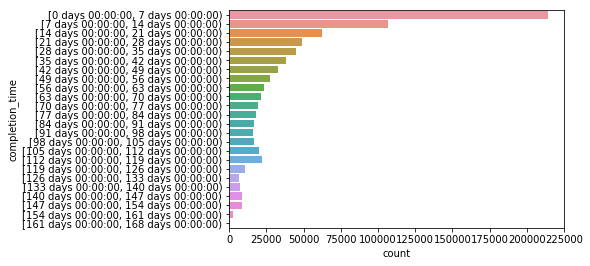

In [13]:
projects_df['completion_time'] = pd.to_datetime(projects_df['date_completed'])-pd.to_datetime(projects_df['date_posted'])
bins = []
for x in range(25):
    bins.append(pd.Timedelta('{} days'.format(x*7)))
print("Time to fully fund completed projects")
sns.countplot(y=pd.cut(projects_df['completion_time'], bins, right=False))

In [14]:
print("Average Donation size")
projects_df['avg_donation'] = projects_df.total_donations/projects_df.num_donors
projects_df.avg_donation[projects_df.avg_donation>0].describe()

Average Donation size


count    999486.000000
mean        196.503003
std         482.747579
min           0.010000
25%          45.000000
50%          84.866667
75%         193.050000
max      100800.010000
Name: avg_donation, dtype: float64

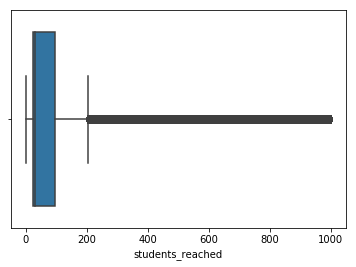

In [15]:
# projects_df.students_reached seems exaggerated in some cases - The largest school districts in the US are NY (995,336), LA (667,273) and Chicago (405,655)
# just plotting the projects with less than 1000 to get an idea of the range
sns.boxplot(x=projects_df.students_reached[projects_df.students_reached<1000])

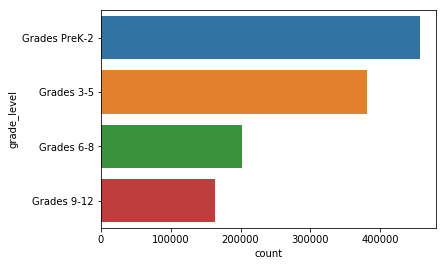

In [16]:
sns.countplot(y='grade_level', data=projects_df, order=['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12'])

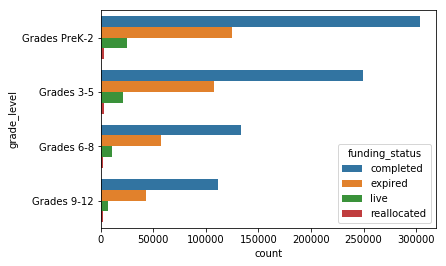

In [17]:
sns.countplot(y='grade_level', hue='funding_status', data=projects_df, order=['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12'])

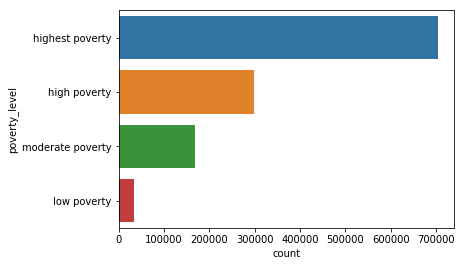

In [18]:
sns.countplot(y='poverty_level', data=projects_df, order=['highest poverty','high poverty','moderate poverty','low poverty'])

In [19]:
grade_counts = pd.DataFrame(projects_df.grade_level.value_counts())
grade_counts['percent'] = grade_counts.grade_level/grade_counts.grade_level.sum()
print("Percentage of Projects by Grade Category")
grade_counts

Percentage of Projects by Grade Category


,grade_level,percent
Grades PreK-2,456098,0.379063
Grades 3-5,381101,0.316733
Grades 6-8,202793,0.168541
Grades 9-12,163232,0.135662


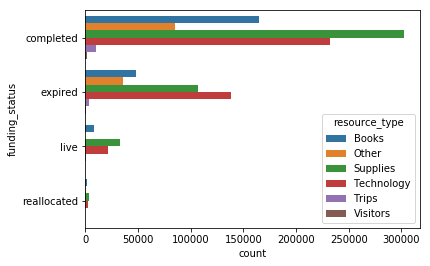

In [20]:
sns.countplot(y='funding_status', hue='resource_type', data=projects_df)

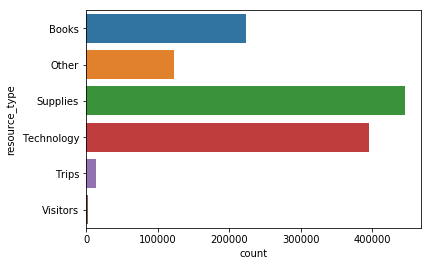

In [21]:
sns.countplot(y='resource_type', data=projects_df)

Small Donations (<$100)


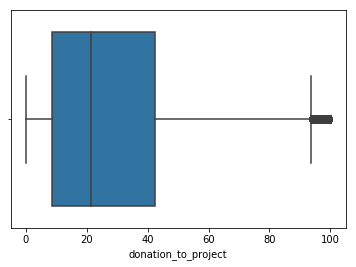

In [22]:
print("Small Donations (<$100)")
sns.boxplot(donations_df.donation_to_project[(donations_df.donation_to_project>0) & (donations_df.donation_to_project<100)])

# Geopandas

In [31]:
projects_df['Coordinates'] = list(zip(projects_df.school_longitude, projects_df.school_latitude))
projects_df['Coordinates'] = projects_df['Coordinates'].apply(Point)

In [32]:
us_state_map = gpd.read_file("shape/states_shape/states.shp")

In [33]:
projects_gpd_df = gpd.GeoDataFrame(projects_df[['_projectid', 'Coordinates', 'school_state','funding_status']], geometry='Coordinates')

In [34]:
projects_gpd_df['funded'] = projects_gpd_df['funding_status'] == "completed"
projects_gpd_df['funded'] = projects_gpd_df['funded'].astype("int")

projects_gpd_df['count'] = 1

In [35]:
state_fund_percent = projects_gpd_df.groupby("school_state").sum()

In [36]:
state_fund_percent['percent'] = state_fund_percent['funded']/state_fund_percent['count']

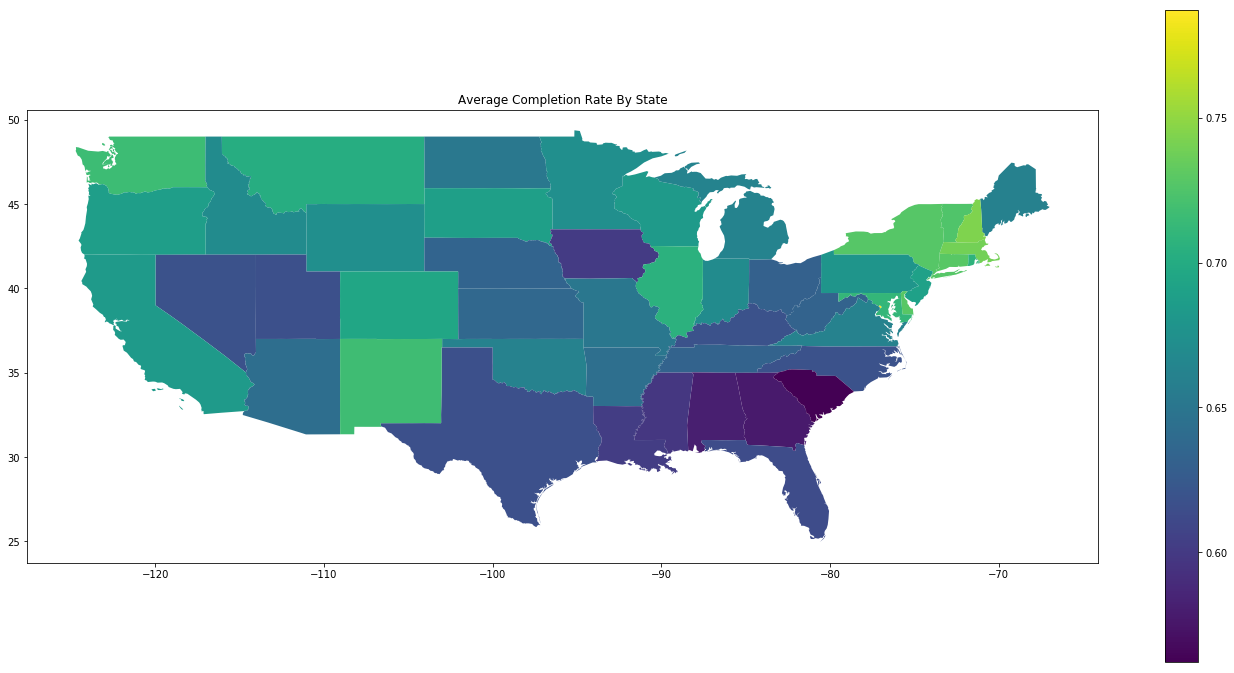

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(24,12)
us_state_map[~us_state_map['STATE_ABBR'].isin(["HI", "AK"])].merge(state_fund_percent, left_on="STATE_ABBR", right_index=True).plot(column="percent", ax=ax, legend=True)
plt.title("Average Completion Rate By State")
plt.savefig("completion_rate_by_state.png")

In [62]:
region_map = {}
for i,state in us_state_map.iterrows():
    region_map[state.STATE_ABBR]=state.SUB_REGION

In [66]:
projects_gpd_df['region'] = projects_gpd_df['school_state'].map(region_map)

In [72]:
region_fund_percent = projects_gpd_df.groupby('region').sum()
region_fund_percent['percent'] = region_fund_percent['funded']/region_fund_percent['count']

In [75]:
region_fund_percent.head(1)

,funded,count,percent
region,,,
East North Central,103000,151448,0.680101


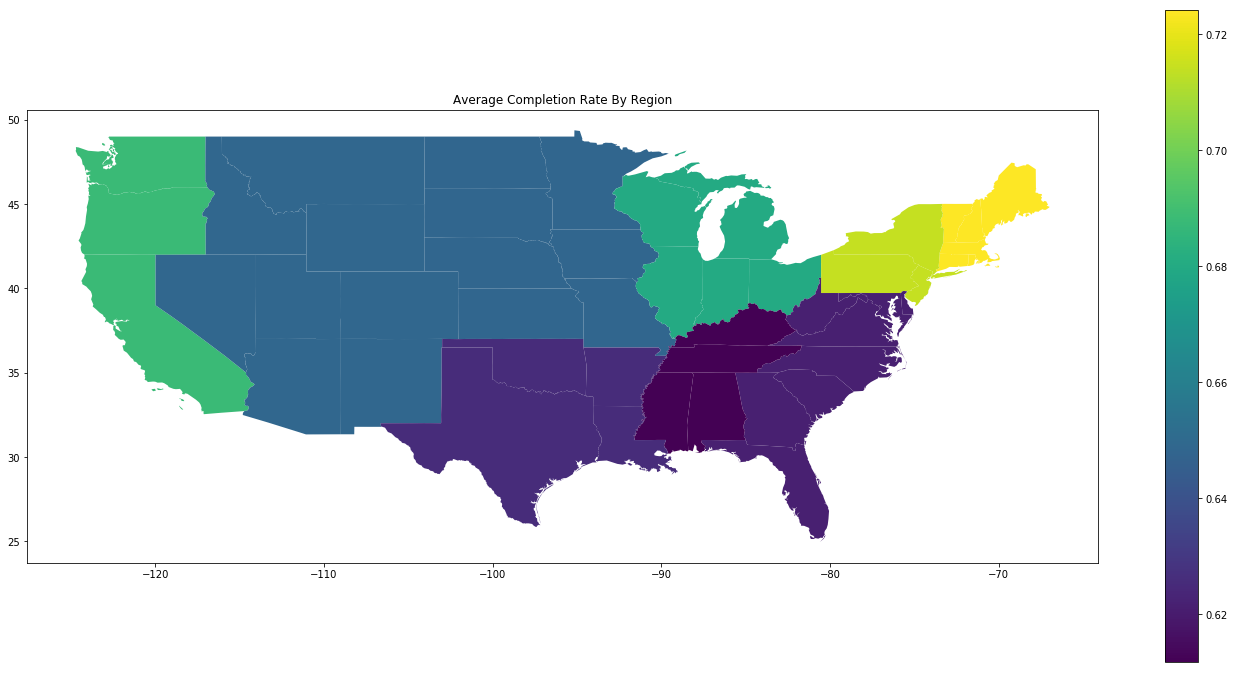

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(24,12)
us_state_map[~us_state_map['STATE_ABBR'].isin(["HI", "AK"])].merge(region_fund_percent, left_on="SUB_REGION", right_on="region").plot(column="percent", ax=ax, legend=True)
plt.title("Average Completion Rate By Region")
plt.savefig("completion_rate_by_region.png")